In [ ]:
# Student Score Predictor
# Introduction
#	Brief: This project predicts student math scores based on reading scores using Linear Regression.

from google.colab import files
upload =files.upload()

Saving StudentsPerformance.csv to StudentsPerformance.csv


In [ ]:
# Import Libraries
# We import the required libraries for data handling, visualization, model building, and evaluation.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score

# Load and Explore Data
# Let's read the dataset and understand its structure with .head(), .describe(), and .info().

students_data = pd.read_csv('StudentsPerformance.csv')
print(students_data)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

In [ ]:
students_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
students_data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
students_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


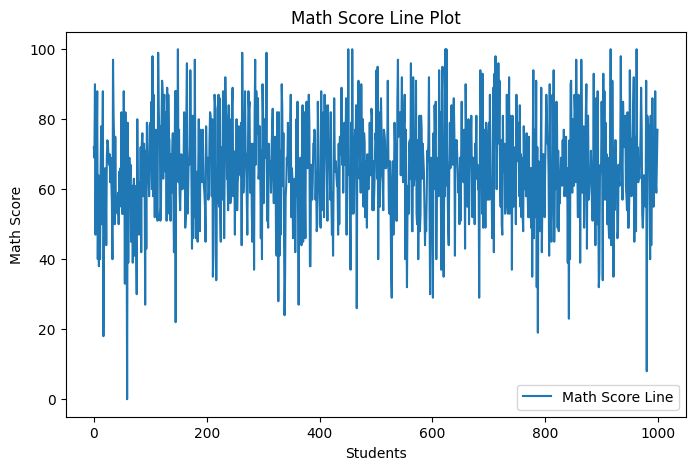

In [ ]:
# Data Visualization
# We visualize the data to see trends and relationships between features.
# Line plot
# A simple line plot of math scores for all students.

plt.figure(figsize=(8,5))
plt.plot(students_data.index, students_data["math score"], label = "Math Score Line")
plt.title("Math Score Line Plot")
plt.xlabel("Students")
plt.ylabel("Math Score")
plt.legend()
plt.show()

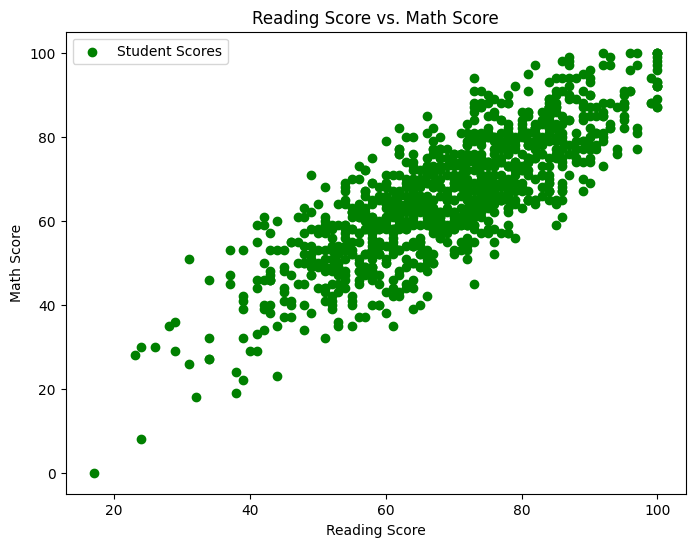

In [ ]:
#Scatter Plot -  to see if students with higher reading scores also get higher math scores.
#Scatter plot to check correlation between reading and math scores.

plt.figure(figsize=(8, 6))
plt.scatter(students_data["reading score"], students_data["math score"], color="green", marker="o", label="Student Scores")
plt.title("Reading Score vs. Math Score")
plt.xlabel("Reading Score")
plt.ylabel("Math Score")
plt.legend()
plt.show()

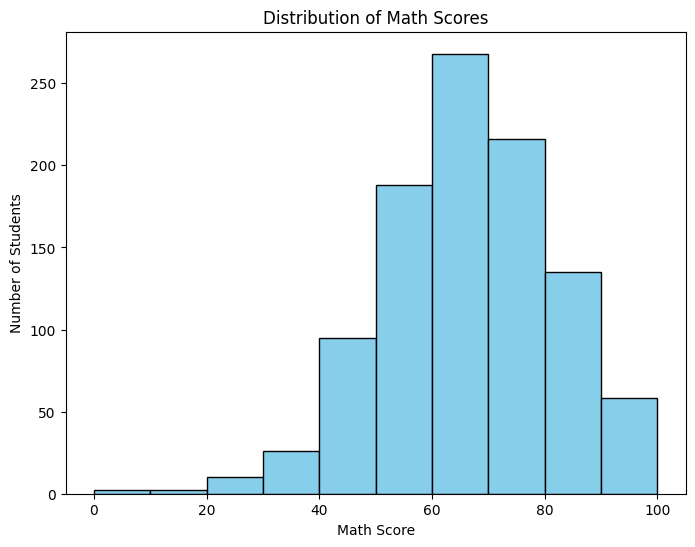

In [ ]:
#Histogram - to show  how scores are distributed — e.g., how many students scored in each range.
#Distribution of students’ math scores.

plt.figure(figsize=(8, 6))
plt.hist(students_data["math score"], bins=10, color="skyblue", edgecolor="black")
plt.title("Distribution of Math Scores")
plt.xlabel("Math Score")
plt.ylabel("Number of Students")
plt.show()

In [ ]:
# Separate features and target
# We define the input (reading score) and output (math score).

x = students_data[['reading score']]     # Feature column must be 2D
y = students_data['math score']      # Target column


In [ ]:
# Split into training and testing data
# Split the dataset into training and test sets (80-20).

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create and train the model
# Training the Linear Regression model.

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test set

y_pred = reg.predict(x_test)

In [ ]:
# Print model parameters

print("Slope (Coefficient):", reg.coef_)
print("Intercept:", reg.intercept_)

# Compare actual vs predicted values

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("Result:", results)

NameError: name 'reg' is not defined

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 7.28
Mean Squared Error (MSE): 77.76
Root Mean Squared Error (RMSE): 8.82
R-squared (R²): 0.68


In [ ]:
print("Actual:", y_test[:5])
print("Predicted:", y_pred[:5])

Actual: 521    91
737    53
740    80
660    74
411    84
Name: math score, dtype: int64
Predicted: [80.41742183 63.48683888 69.41254291 72.7986595  77.87783439]


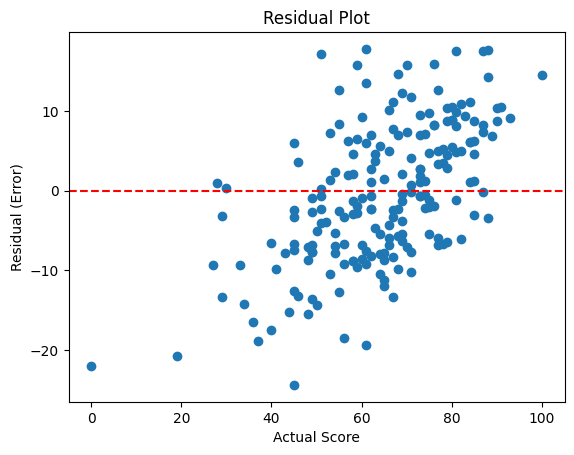

In [ ]:
plt.scatter(y_test, y_test - y_pred)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Score")
plt.ylabel("Residual (Error)")
plt.title("Residual Plot")
plt.show()

Project Summary:
***`This notebook predicts student scores based on hours studied using Linear Regression. Dataset: dummy dataset with 25 records. Steps include data cleaning, visualization, model training, evaluation (R², MAE), and predictions.`***